<a href="https://colab.research.google.com/github/jansle2005/Data-Science-Repository/blob/master/Scrapper%20do%20Twittter%20Sem%20API_22_02_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Scrapping & Analysis - 22/02/2022 - 06:00h - Quarta-feira de Carnaval

## Instalações de Bibliotecas

In [147]:
!pip install snscrape
!pip install pandas
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importa Bibliotecas

In [148]:
import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter
import datetime
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

## Input dos Filtros

In [149]:
text = input('TEXT da consulta (ou deixe em branco pressionando enter)')
username = input('Digite o(s) NOME(s) de usuário(s) específico(s) de uma conta do Twitter sem @ (ou deixe em branco - enter): ')
data1 = input('DATA1 início aaaa-mm-dd (ou deixe em branco com enter): ')
data2 = input('DATA2 final  aaaa-mm-dd (ou deixe em branco com enter): ')
# Essa alteração a seguir ses faz necessária devido ao método de contagem de dias do snscraper
def day_after(data2):
  data = datetime.datetime.strptime(data2, '%Y-%m-%d')
  dia_seguinte = data + datetime.timedelta(days=1)
  data_formatada = dia_seguinte.strftime('%Y-%m-%d')
  return data_formatada
data2=day_after(data2)

count = int(input('Digite o número máximo de tweets ou digite -1 para recuperar todos os tweets possíveis: '))
retweet ='s' #input('Excluir Retweets? (s/n): ')
replies ='s' #input('Excluir Replies? (s/n): ')

TEXT da consulta (ou deixe em branco pressionando enter)Anatel
Digite o(s) NOME(s) de usuário(s) específico(s) de uma conta do Twitter sem @ (ou deixe em branco - enter): 
DATA1 início aaaa-mm-dd (ou deixe em branco com enter): 2023-02-10
DATA2 final  aaaa-mm-dd (ou deixe em branco com enter): 2023-02-19
Digite o número máximo de tweets ou digite -1 para recuperar todos os tweets possíveis: 1000


In [152]:
def search(text,username,data1,data2,retweet,replies):
    global filename

    q = text+ ' lang:pt'
   
    if username!='': q += f" from:{username}"   
    if data1=='':   data1 = datetime.datetime.strftime(datetime.datetime.strptime(data2, '%Y-%m-%d') - datetime.timedelta(days=7), '%Y-%m-%d')
    
    q += f" since:{data1}" 
    
    if data2=='': data2 = datetime.datetime.strftime(datetime.date.today(), '%Y-%m-%d')
    
    q += f" until:{data2}"
   
    if retweet == 's':   q += f" exclude:retweets"
    if replies == 's':   q += f" exclude:replies"
    if username!='' and text!='':   filename = f"{data1}_{data2}_{username}_{text}.csv"
    elif username!="":              filename = f"{data1}_{data2}_{username}.csv"
    else:                           filename = f"{data1}_{data2}_{text}.csv"
    
    print(filename)
    print('q FINAL = ',q)
    return q

In [153]:
q=search(text,username,data1,data2,retweet,replies)

2023-02-10_2023-02-20_Anatel.csv
q FINAL =  Anatel lang:pt since:2023-02-10 until:2023-02-20 exclude:retweets exclude:replies


## Inicia o Scrapping

In [162]:
# ___________________________________________

# Criação da lista  vazia que se fará append de dados de tweet  e do dataframe
tweets_list1 = []
tweets_df1=[]


# Usar TwitterSearchScraper para raspar dados do Tweeter para apensar a uma lista
if count == -1:
    for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(q).get_items())):
        tweets_list1.append([tweet.date, 
                             tweet.id, 
                             tweet.rawContent, 
                             tweet.user.username,
                             tweet.user.location,
                             tweet.place,
                             tweet.hashtags,
                             tweet.likeCount])

else:
    with tqdm_notebook(total=count) as pbar:
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
            if i>=count: #number of tweets you want to scrape
                break
            tweets_list1.append([tweet.date, 
                                 tweet.id, 
                                 tweet.rawContent, 
                                 tweet.user.username,
                                 tweet.user.location,
                                 tweet.place,
                                 tweet.hashtags,
                                 tweet.likeCount])
            
            pbar.update(1)

# Criar dataframe partindo da lista criada acima 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['DateTime', 'TweetId', 'Text', 'Username','Local','Place',
                                'Hashtags','LikeCount'])


#___________________________________________

  0%|          | 0/1000 [00:00<?, ?it/s]

In [163]:
tweets_df1.sort_values(by='DateTime')

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount
999,2023-02-10 20:35:25+00:00,1624145032688111625,Anatel acabando com a alegria do pobre,AdeilsonkF,"Santa Catarina, Brasil",None,None,0
998,2023-02-10 20:35:58+00:00,1624145169762160660,Eu pagava a Sky certinho como um bom cidadão o...,Siiiiiiiiiii07,,None,None,1
997,2023-02-10 20:37:45+00:00,1624145617827074061,Anatel determina desligamento de 5 milhões de ...,AgenciaEstado,"São Paulo, Brasil",None,None,1
996,2023-02-10 20:39:00+00:00,1624145932710461440,"Em #CBNTecnologia, Thássius Veloso (@thassius)...",CBNoficial,,None,"[CBNTecnologia, NoArNaCBN]",9
995,2023-02-10 20:39:22+00:00,1624146024485818392,"Vsf Anatel, não toque na minha tv box",WendrickB,"Brasília, Brasil",None,None,0
...,...,...,...,...,...,...,...,...
4,2023-02-19 20:04:54+00:00,1627398844639023105,Alô @vivobr @TIMBrasil e @ClaroBrasil as cidad...,henriqvalentim,"São José dos Campos, Brasil",None,[anatel],0
3,2023-02-19 20:11:19+00:00,1627400458816946178,Reclamação aberta na Anatel a equipe da tim fi...,hollasonny,"São Paulo, Brasil",None,None,0
2,2023-02-19 23:15:39+00:00,1627446845659090945,"Anatel pegou, já era https://t.co/yNbdeI4PB4",Zanfa,Farroups,None,None,269
1,2023-02-19 23:32:59+00:00,1627451209391931394,Simplesmente perfeita ❤️,monassa_gabriel,"Rio de Janeiro, Brasil",None,None,2


In [164]:
tweets_df1['Place'].fillna(' ', inplace=True)
tweets_df1['Local'].fillna(' ', inplace=True)

print(tweets_df1.dtypes)


DateTime     datetime64[ns, UTC]
TweetId                    int64
Text                      object
Username                  object
Local                     object
Place                     object
Hashtags                  object
LikeCount                  int64
dtype: object


In [165]:
import pandas as pd
# carrega o arquivo com as cidades e UFs
df_cidades = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

In [166]:
codigo_uf = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO',
    21: 'MA', 22: 'PI', 23: 'CE', 24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA',
    31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP',
    41: 'PR', 42: 'SC', 43: 'RS',
    50: 'MS', 51: 'MT', 52: 'GO', 53: 'DF'
}

df_cidades['UF'] = df_cidades['codigo_uf'].map(codigo_uf)
df_cidades

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario,UF
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo,GO
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo,MG
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo,GO
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo,MG
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo,PA
...,...,...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29,3971,74,America/Sao_Paulo,BA
5566,2517407,Zabelê,-8.07901,-37.1057,0,25,542,83,America/Sao_Paulo,PB
5567,3557154,Zacarias,-21.05060,-50.0552,0,35,2973,18,America/Sao_Paulo,SP
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21,1287,98,America/Sao_Paulo,MA


In [167]:
# cria um dicionário com a relação UF -> cidade
uf_cidade_dict = {}
for uf in df_cidades['UF'].unique():
    uf_cidade_dict[uf] = set(df_cidades[df_cidades['UF'] == uf]['nome'].str.lower())

# função para obter a UF a partir de uma string
def get_uf_string(string):
    for uf, cidades in uf_cidade_dict.items():
        if any(cidade in string.lower() for cidade in cidades):
            return uf
    return None

# aplica a função em cada linha do dataframe de tweets
tweets_df1['UF1'] = tweets_df1.apply(lambda row: get_uf_string(row['Local']), axis=1)

In [168]:
display(tweets_df1)

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount,UF1
0,2023-02-19 23:43:18+00:00,1627453806823743489,Vi uma reportagem ainda agora dizendo que a An...,NerdFutsal,,,"[IPTV, tvbox, anatel, presidio, celular, bloqu...",0,None
1,2023-02-19 23:32:59+00:00,1627451209391931394,Simplesmente perfeita ❤️,monassa_gabriel,"Rio de Janeiro, Brasil",,None,2,RJ
2,2023-02-19 23:15:39+00:00,1627446845659090945,"Anatel pegou, já era https://t.co/yNbdeI4PB4",Zanfa,Farroups,,None,269,None
3,2023-02-19 20:11:19+00:00,1627400458816946178,Reclamação aberta na Anatel a equipe da tim fi...,hollasonny,"São Paulo, Brasil",,None,0,SP
4,2023-02-19 20:04:54+00:00,1627398844639023105,Alô @vivobr @TIMBrasil e @ClaroBrasil as cidad...,henriqvalentim,"São José dos Campos, Brasil",,[anatel],0,SC
...,...,...,...,...,...,...,...,...,...
995,2023-02-10 20:39:22+00:00,1624146024485818392,"Vsf Anatel, não toque na minha tv box",WendrickB,"Brasília, Brasil",,None,0,DF
996,2023-02-10 20:39:00+00:00,1624145932710461440,"Em #CBNTecnologia, Thássius Veloso (@thassius)...",CBNoficial,,,"[CBNTecnologia, NoArNaCBN]",9,None
997,2023-02-10 20:37:45+00:00,1624145617827074061,Anatel determina desligamento de 5 milhões de ...,AgenciaEstado,"São Paulo, Brasil",,None,1,SP
998,2023-02-10 20:35:58+00:00,1624145169762160660,Eu pagava a Sky certinho como um bom cidadão o...,Siiiiiiiiiii07,,,None,1,None


## Fazer Análise de Sentimento

In [22]:
focus_word=text

### TextBlob

In [23]:
from textblob import TextBlob

# função para calcular o número de palavras em cada tweet
def contar_palavras(tweet):
    return len(tweet.split())

# função para calcular a polaridade do tweet usando TextBlob
def calcular_polaridade(tweet):
    tb = TextBlob(tweet)
    return tb.sentiment.polarity

# função para calcular o sentimento do tweet usando TextBlob
def calcular_sentimento(tweet):
    tb = TextBlob(tweet)
    return tb.sentiment.subjectivity

# adicionar coluna com o número de palavras de cada tweet
tweets_df1['num_palavras_Blob'] = tweets_df1['Text'].apply(contar_palavras)

# adicionar coluna com a polaridade de cada tweet
tweets_df1['polari_Blob'] = tweets_df1['Text'].apply(calcular_polaridade)

# adicionar coluna com o sentimento de cada tweet
tweets_df1['senti_Blob'] = tweets_df1['Text'].apply(calcular_sentimento)

In [124]:
display(tweets_df1)

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount,UF1,Date
0,2023-02-12 23:57:36+00:00,1624920691140075521,Minha TV box hoje com mais de 5 min de delay. ...,viniciusvgoes,"Santa Catarina, Brasil",None,None,0,CE,2023-02-12
1,2023-02-12 23:48:04+00:00,1624918290891182081,"Após determinação de bloqueios, saiba quais sã...",BahiaNoticias,"Salvador, Brasil",None,[BahiaNoticias],4,BA,2023-02-12
2,2023-02-12 23:42:34+00:00,1624916906913275904,caraaaa a anatel cortou o sinal do aparelhinho...,marlozineoo,Pandora,None,None,1,None,2023-02-12
3,2023-02-12 23:38:13+00:00,1624915810459308032,Nossa eu lembrando q eu ia ser atendente da An...,hoseoknown,,None,None,0,None,2023-02-12
4,2023-02-12 23:37:25+00:00,1624915611649208324,Pô a anatel tava esperando só a minha mãe comp...,nedeongunes,,None,None,0,None,2023-02-12
...,...,...,...,...,...,...,...,...,...,...
75,2023-02-12 12:31:49+00:00,1624748107111038981,"Saiba identificar TV Box clandestina, que vai ...",cdcrio,Rio de Janeiro,None,None,0,RJ,2023-02-12
76,2023-02-12 12:12:17+00:00,1624743192099803136,Caçada da Anatel ao “gatonet” coloca Magazine ...,radiopampapoa,Porto Alegre/RS,None,"[RádioPampa, RedePampa, Pampa, rádio, Informaç...",1,PI,2023-02-12
77,2023-02-12 12:08:35+00:00,1624742260687380480,#Anatel todo dia a @ClaroBrasil e o @bradescos...,odouradofelipe,"Águas Claras, Brasília",None,[Anatel],0,DF,2023-02-12
78,2023-02-12 11:47:58+00:00,1624737070877999105,o segundo não é responsabilidade da Anatel,advocatboy,,None,None,7,None,2023-02-12


'Mano a tim manda muita mensagem, qualquer hora vou ligar na Anatel e vou lacrar eles la, que perturbação meu'

### Vander com Focus Word

In [25]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instancia o SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Itera sobre cada texto na coluna "Text"
for index, row in tweets_df1.iterrows():
    text = row["Text"]
    
    # Aplica a análise de sentimento do VADER
    sentiment_scores = analyzer.polarity_scores(text)
    
    # Adiciona o resultado à nova coluna "Sent VANDER"
    tweets_df1.loc[index, "Sent VANDER"] = sentiment_scores["compound"]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [28]:
tweets_df1

,DateTime,TweetId,Text,Username,Local,Obj Place,Hashtags,LikeCount,num_palavras_Blob,polari_Blob,senti_Blob,Sent VANDER
0,2023-02-12 23:57:36+00:00,1624920691140075521,Minha TV box hoje com mais de 5 min de delay. ...,viniciusvgoes,"Santa Catarina, Brasil",None,None,0,18,0.0,0.0,-0.3182
1,2023-02-12 23:48:04+00:00,1624918290891182081,"Após determinação de bloqueios, saiba quais sã...",BahiaNoticias,"Salvador, Brasil",None,[BahiaNoticias],4,16,0.0,0.0,0.0000
2,2023-02-12 23:42:34+00:00,1624916906913275904,caraaaa a anatel cortou o sinal do aparelhinho...,marlozineoo,Pandora,None,None,1,12,0.0,0.0,0.0000
3,2023-02-12 23:38:13+00:00,1624915810459308032,Nossa eu lembrando q eu ia ser atendente da An...,hoseoknown,,None,None,0,17,0.0,0.0,0.0000
4,2023-02-12 23:37:25+00:00,1624915611649208324,Pô a anatel tava esperando só a minha mãe comp...,nedeongunes,,None,None,0,30,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
1508,2023-02-09 11:30:11+00:00,1623645430356606982,"Anatel não descarta intervenção na Oi, diz pre...",folhape,Recife-PE,None,None,1,11,0.0,0.0,0.0000
1509,2023-02-09 11:02:36+00:00,1623638491501322241,Aqui não tem nenhum palhaço não!!! Protocolo r...,BTropicos,,None,None,0,11,0.0,0.0,0.0000
1510,2023-02-09 09:57:12+00:00,1623622029814423553,Já que você não quer resolver por conta própri...,rafaelcalimanr,"Vitória, ES, Brasil",None,None,1,14,0.0,0.0,0.1779
1511,2023-02-09 01:51:16+00:00,1623499741500698627,Procon/MA reúne com Anatel em busca de melhori...,Correio_DF,"Distrito Federal, Brasil",None,None,0,17,0.0,0.0,-0.2960


In [30]:
tweets_df1

,DateTime,TweetId,Text,Username,Local,Obj Place,Hashtags,LikeCount,num_palavras_Blob,polari_Blob,senti_Blob,Sent VANDER,Vander_Focus_Word_e_NEGWords
0,2023-02-12 23:57:36+00:00,1624920691140075521,Minha TV box hoje com mais de 5 min de delay. ...,viniciusvgoes,"Santa Catarina, Brasil",None,None,0,18,0.0,0.0,-0.3182,0.0
1,2023-02-12 23:48:04+00:00,1624918290891182081,"Após determinação de bloqueios, saiba quais sã...",BahiaNoticias,"Salvador, Brasil",None,[BahiaNoticias],4,16,0.0,0.0,0.0000,0.0
2,2023-02-12 23:42:34+00:00,1624916906913275904,caraaaa a anatel cortou o sinal do aparelhinho...,marlozineoo,Pandora,None,None,1,12,0.0,0.0,0.0000,0.0
3,2023-02-12 23:38:13+00:00,1624915810459308032,Nossa eu lembrando q eu ia ser atendente da An...,hoseoknown,,None,None,0,17,0.0,0.0,0.0000,0.0
4,2023-02-12 23:37:25+00:00,1624915611649208324,Pô a anatel tava esperando só a minha mãe comp...,nedeongunes,,None,None,0,30,0.0,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,2023-02-09 11:30:11+00:00,1623645430356606982,"Anatel não descarta intervenção na Oi, diz pre...",folhape,Recife-PE,None,None,1,11,0.0,0.0,0.0000,0.0
1509,2023-02-09 11:02:36+00:00,1623638491501322241,Aqui não tem nenhum palhaço não!!! Protocolo r...,BTropicos,,None,None,0,11,0.0,0.0,0.0000,0.0
1510,2023-02-09 09:57:12+00:00,1623622029814423553,Já que você não quer resolver por conta própri...,rafaelcalimanr,"Vitória, ES, Brasil",None,None,1,14,0.0,0.0,0.1779,0.0
1511,2023-02-09 01:51:16+00:00,1623499741500698627,Procon/MA reúne com Anatel em busca de melhori...,Correio_DF,"Distrito Federal, Brasil",None,None,0,17,0.0,0.0,-0.2960,0.0


# Gráfico de Barras - Tweets por dia

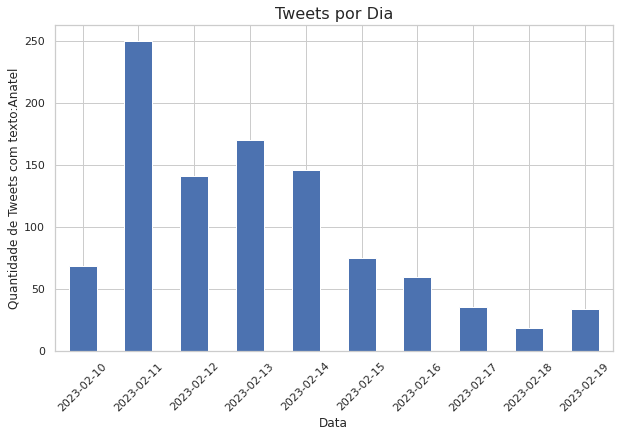

In [169]:
import matplotlib.pyplot as plt
tweets_df1['Date'] = pd.to_datetime(tweets_df1['DateTime']).dt.date
tweets_por_dia = tweets_df1['Date'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6))
tweets_por_dia.plot(kind='bar', ax=ax)
ax.set_xticklabels(tweets_por_dia.index, rotation=45)
ax.set_title('Tweets por Dia', fontsize=16)
ax.set_xlabel('Data',fontsize=12)
ax.set_ylabel('Quantidade de Tweets com texto:'+ text,fontsize=12)
nome_arquivo = "BarGraph_Tweets_" + text + '_since_' + data1 + '_til_' + data2+".png"
plt.savefig(nome_arquivo,dpi=300, bbox_inches='tight')
plt.show()

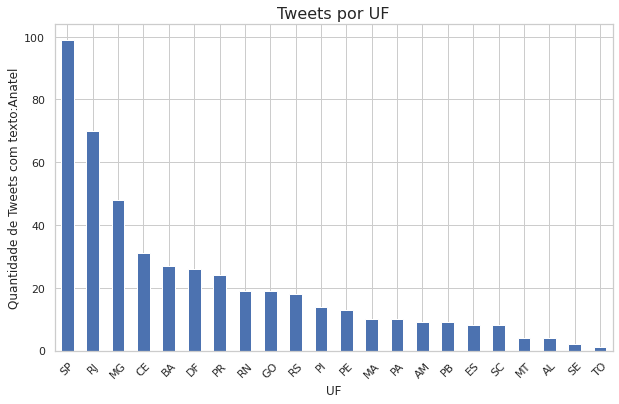

In [170]:
tweets_por_estado = tweets_df1['UF1'].value_counts()
fig, ax = plt.subplots(figsize=(10,6))
tweets_por_estado.plot(kind='bar', ax=ax)
ax.set_xticklabels(tweets_por_estado.index, rotation=45)
ax.set_title('Tweets por UF', fontsize=16)
ax.set_xlabel('UF',fontsize=12)
ax.set_ylabel('Quantidade de Tweets com texto:'+ text,fontsize=12)
nome_arquivo = "BarGraph_Tweets_UFs" + text + '_since_' + data1 + '_til_' + data2+".png"
plt.savefig(nome_arquivo,dpi=300, bbox_inches='tight')
plt.show()


# Nuvem de palavras

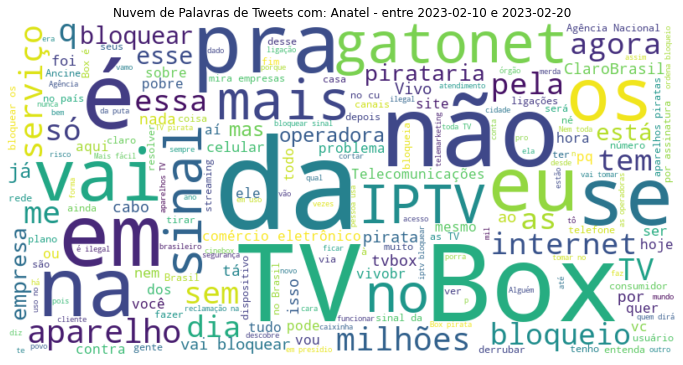

In [171]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

texto = ' '.join(tweets_df1['Text'])
lista_sabida = text.split()
cai_fora = ['como','com','t','que','https', 'co', 'RT', 'para', 'sua', 'de', 'a', 'o', 'seu', 'teu', 'tua', 'minha', 'meu', 'do', 'e', 'um', 'uma', 'pelo'] + lista_sabida
wc = WordCloud(width=800, height=400, background_color='white', max_words=200, stopwords=cai_fora)
wc.generate_from_text(texto)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(wc, interpolation='bilinear')
ax.axis('off')

title = "Nuvem de Palavras de Tweets com: " + text + ' - entre ' + data1 + ' e ' + data2
ax.set_title(title, fontsize=12, color='black')

nome_arquivo = "WordCloud_Tweets_com_" + text + '_since_' + data1 + '_til_' + data2+".png"
plt.savefig(nome_arquivo,dpi=300, bbox_inches='tight')
plt.show()